In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
### CONSTANTS ###

buffer = 1

#energy of the undefected cell
E_perfect = -510.033 #eV

#energy of the MgO primitive cell
E_primitive = -15.9481 #eV

#valence band max energy
E_VBM = 3.70576 #eV

#Conduction band minimum energy
E_CBM = 10.3249 #eV

#Free Energy of Pure Oxygen Unit Cell
E_O_cell = -64.6919 #eV

#Energy per Oxygen atom
E_O_atom = E_O_cell / 8
print("Energy per Oxygen Atom {:.3f} eV".format(E_O_atom))

#Free Energy of Pure Magnesium Unit Cell
E_Mg_cell = -12.0457 #eV

#Energy per Magnesium atom
E_Mg_atom = E_Mg_cell / 9
print("Energy per Magnesium Atom {:.3f} eV".format(E_Mg_atom))

#Supercell Formation Energy
E_formation = E_primitive - (E_O_atom + E_Mg_atom)
print("Formation Energy {:.3f} eV".format(E_formation))

### Assuming Mg-Rich Conditions ###

#Chemical Potential of Magnesium
delta_mu_Mg = 0
mu_Mg = delta_mu_Mg + E_Mg_atom
print("Chemical Potential of Mg {:.3f} eV/atom".format(mu_Mg))

#Chemical Potential of Oxygen
delta_mu_O = E_formation
mu_O = delta_mu_O + E_O_atom
print("Chemical Potential of O {:.3f} eV/atom".format(mu_O))

### Fermi Level ###

fermiLevel = np.linspace(E_VBM-buffer, E_CBM+buffer, 1000)

Energy per Oxygen Atom -8.086 eV
Energy per Magnesium Atom -1.338 eV
Formation Energy -6.523 eV
Chemical Potential of Mg -1.338 eV/atom
Chemical Potential of O -14.610 eV/atom


In [3]:
def plotCurve(lbl, n_Mg, n_O, color):
    
    q = np.array(data["Charge_State"])
    E_df = np.array(data["Free_Energy"])
    E_corr = np.array(data["Freysoldt_Corr"])

    defectEnthalpyList = []
    for i in range(len(q)):
        defectEnthalpy = E_df[i] - E_perfect + q[i]*fermiLevel + E_corr[i] - (n_Mg*mu_Mg + n_O*mu_O)
        defectEnthalpyList.append(defectEnthalpy)

    defectEnthalpyList = np.array(defectEnthalpyList)
    minEnergyCurve = np.amin(defectEnthalpyList, axis=0)

    plt.plot(fermiLevel-E_VBM, minEnergyCurve, label=lbl, c=color)

    dx = (E_CBM-E_VBM)/(fermiLevel.shape[0]-1)

    grad = np.gradient(minEnergyCurve, dx)
    intersectionRegion = (np.abs(np.diff(grad))>0.0001).astype(np.float32)
    xpoints = (fermiLevel-E_VBM)[:-2][np.diff(intersectionRegion)==1]
    ypoints = minEnergyCurve[:-2][np.diff(intersectionRegion)==1]

    plt.scatter(xpoints,ypoints, s=5, c=color)  

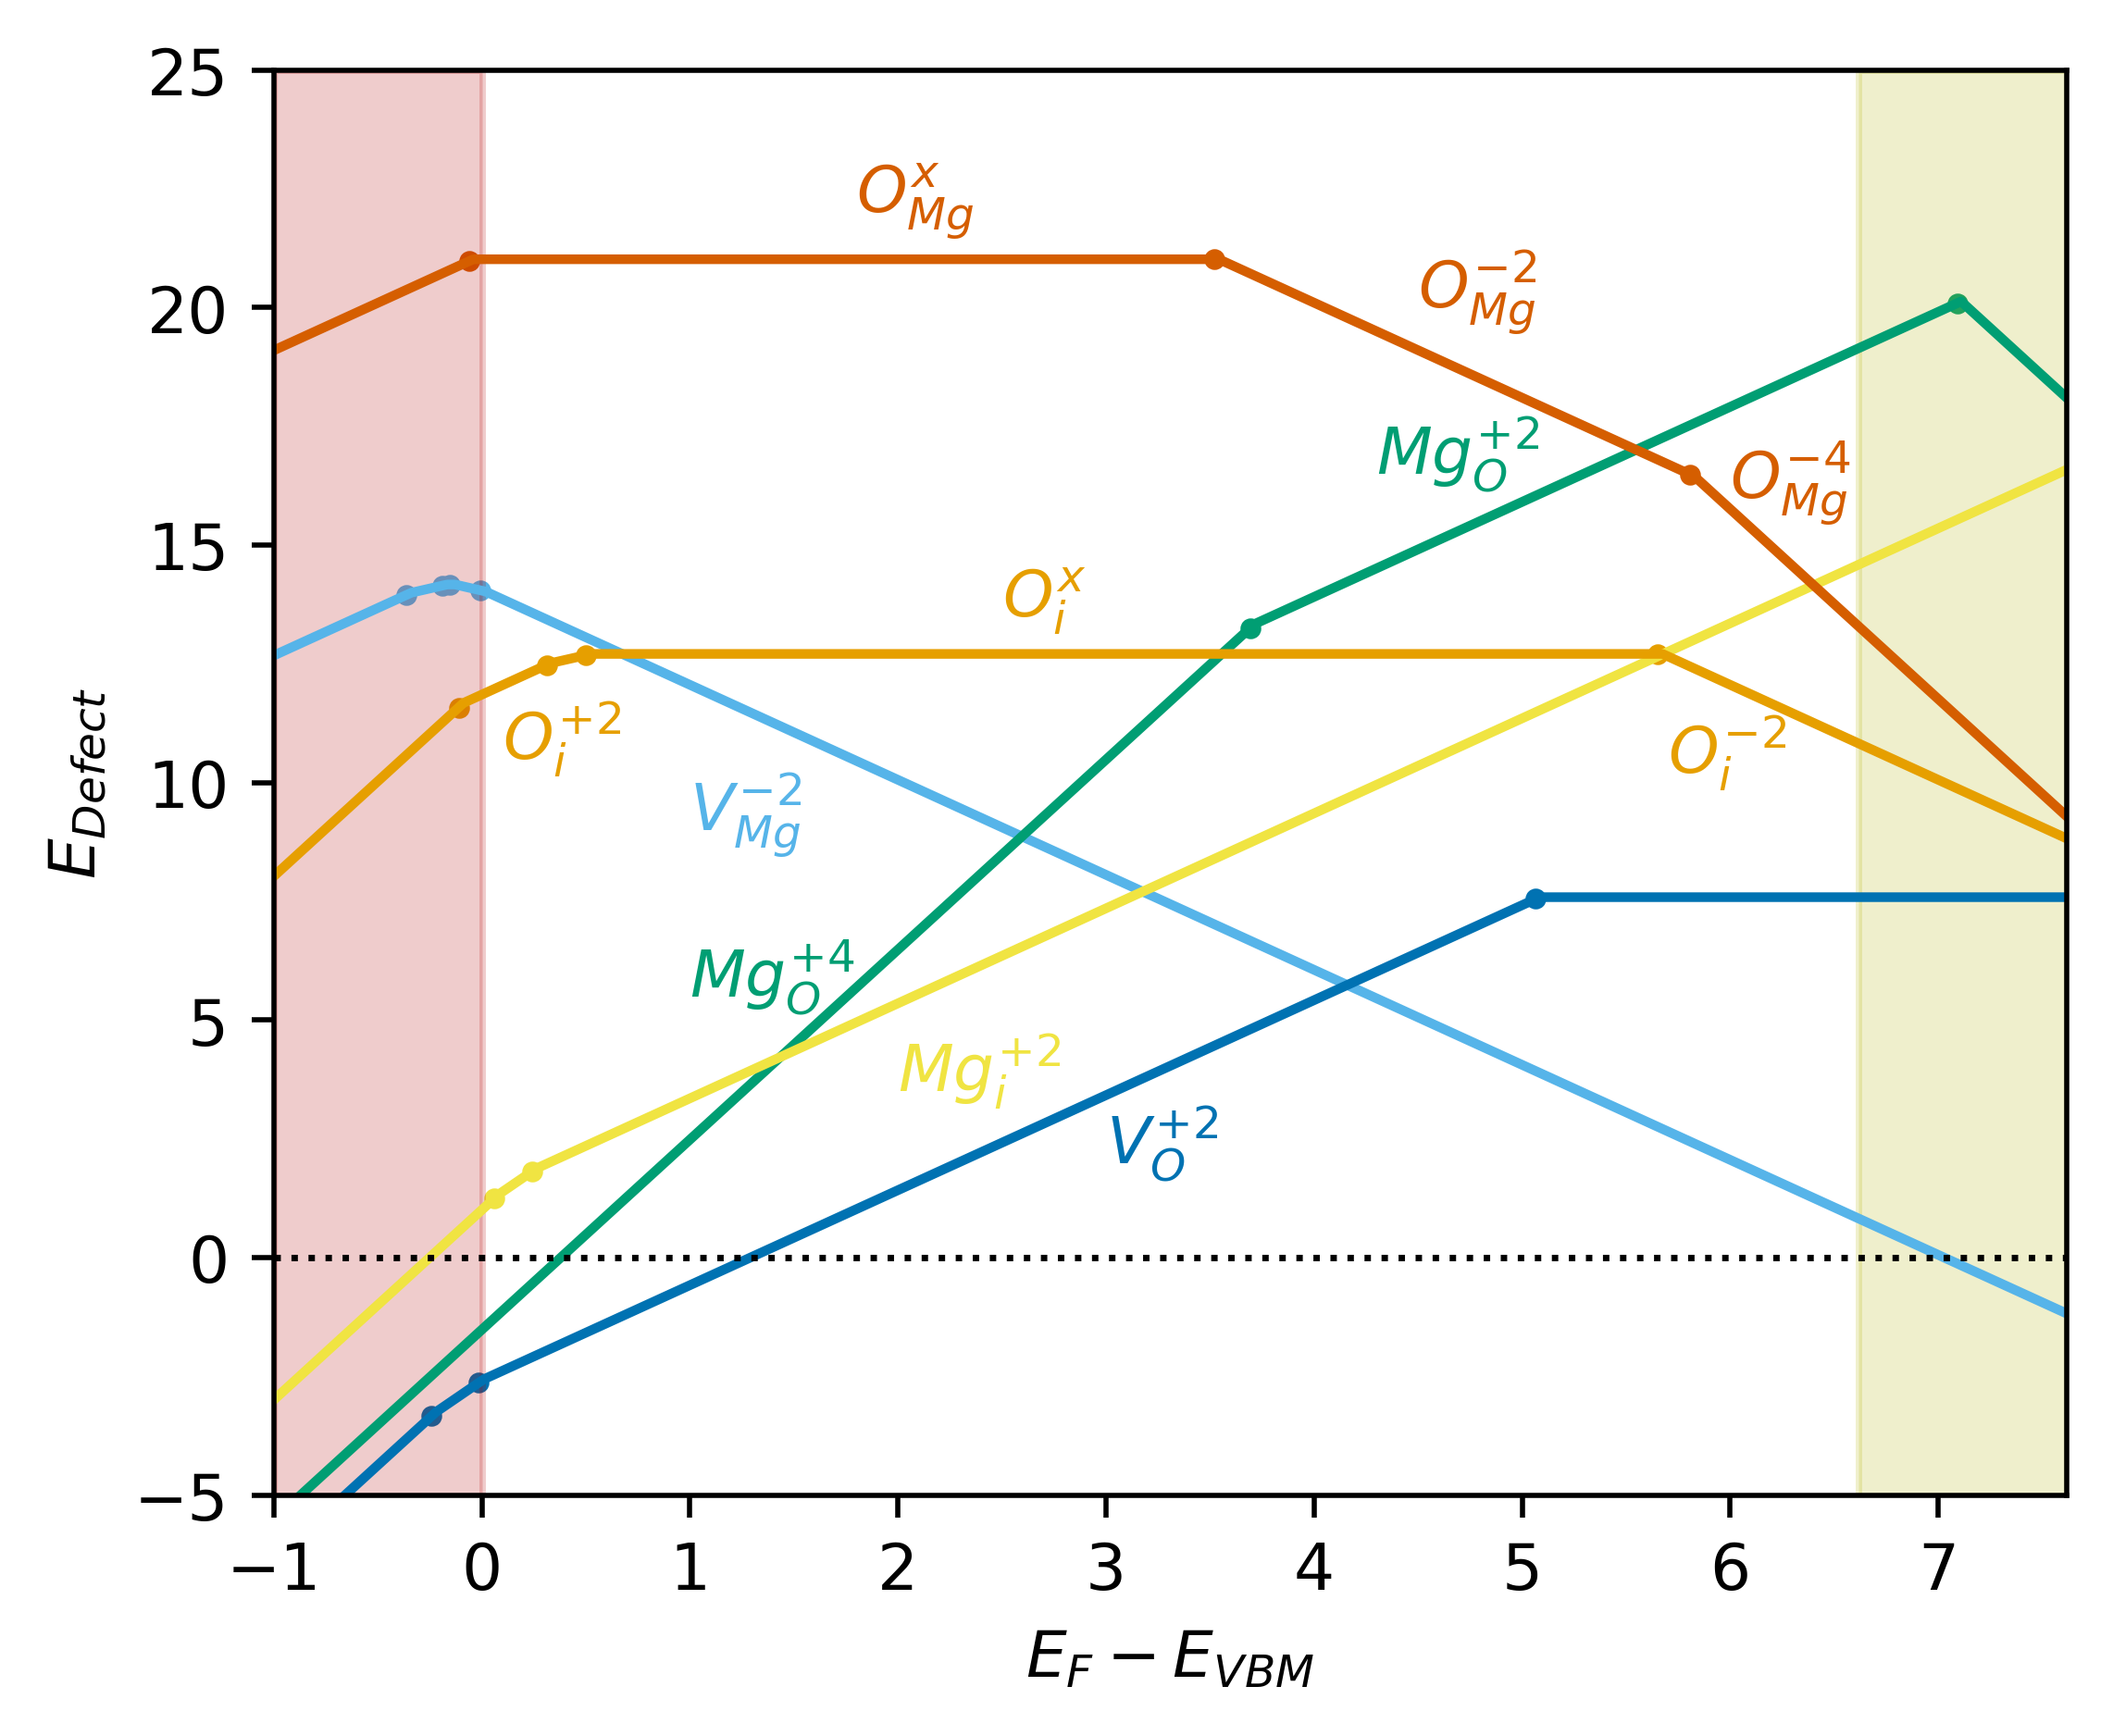

In [4]:
#Set up plot
plt.figure(figsize=(5,4), dpi=500)

colors = ['#56B4E9', '#009E73', '#F0E442', '#0072B2', '#d55E00', "#E69F00"]

#Mg Vacancy
data = pd.read_csv("../DFT_Data/Sym/Magnesium_Vacancy/Mg_Vacancy_Energy.txt", delimiter=" ")
plotCurve("Mg Vacancy", -1, 0, colors[0])
plt.text(1, 9, "$V^{-2}_{Mg}$",c=colors[0])


#Mg Antisite
data = pd.read_csv("../DFT_Data/No_Sym/Magnesium_Antisite/Mg_Antisite_Energy.txt", delimiter=" ")
plotCurve("Mg Antisite", 1, -1, colors[1])
plt.text(1, 5.5, "$Mg^{+4}_{O}$",c=colors[1])
plt.text(4.3, 16.5, "$Mg^{+2}_{O}$",c=colors[1])


#Mg Interstitial
data = pd.read_csv("../DFT_Data/Sym/Magnesium_Interstitial/Mg_Interstitial_Energy.txt", delimiter=" ")
plotCurve("Mg Interstitial", 1, 0, colors[2])
plt.text(2, 3.5, "$Mg^{+2}_{i}$",c=colors[2])


#O Vacancy
data = pd.read_csv("../DFT_Data/Sym/Oxygen_Vacancy/O_Vacancy_Energy.txt", delimiter=" ")
plotCurve("O Vacancy", 0, -1, colors[3])
plt.text(3, 2, "$V^{+2}_{O}$",c=colors[3])


#O Antisite
data = pd.read_csv("../DFT_Data/No_Sym/Oxygen_Antisite/O_Antisite_Energy.txt", delimiter=" ")
plotCurve("O Antisite", -1, 1, colors[4])
plt.text(1.8, 22, "$O^{x}_{Mg}$",c=colors[4])
plt.text(4.5, 20, "$O^{-2}_{Mg}$",c=colors[4])
plt.text(6, 16, "$O^{-4}_{Mg}$",c=colors[4])


#O Interstitial
data = pd.read_csv("../DFT_Data/No_Sym/Oxygen_Interstitial/O_Interstitial_Energy.txt", delimiter=" ")
plotCurve("O Interstitial", 0, 1, colors[5])
plt.text(2.5, 13.5, "$O^{x}_{i}$",c=colors[5])
plt.text(0.1, 10.5, "$O^{+2}_{i}$",c=colors[5])
plt.text(5.7, 10.2, "$O^{-2}_{i}$",c=colors[5])

#Conduction Band
plt.fill_between([E_CBM-E_VBM, E_CBM-E_VBM+buffer], -8, 25, color=(0.7, 0.7, 0, 0.2))
plt.fill_between([-buffer, 0], -8, 25, color=(0.7, 0, 0, 0.2))
#zero line
plt.plot([-buffer, E_CBM+buffer-E_VBM], [0, 0], linestyle='dotted', color="k", linewidth=1)

#Format Plot
plt.xlim(-buffer, E_CBM+buffer-E_VBM)
plt.xlabel("$E_F -  E_{VBM}$")
plt.ylabel("$E_{Defect}$")
plt.ylim(-5,25)
plt.savefig("defect_energy.pdf")
plt.show()